# CEP COVERED BY CURRENTLY ACCREDITED BODYSHOPS

In this notebook we analyze the tables created by the dbt process in charge of generating the allowed CEPs for commercialization (open CEPs):
- Link to dbt models: https://github.com/justosbr/dbt_cep_codes/tree/master/models/cep_codes

In [1]:
# Imports
import pandas as pd
import numpy as np
import psycopg2, os

# Establish connection and create its cursor
try: 
    conn = psycopg2.connect(f"host={os.environ['AURORA_POSTGRES_HOST']} dbname={os.environ['AURORA_POSTGRES_DATABASE']} user={os.environ['AURORA_POSTGRES_USERNAME']} password={os.environ['AURORA_POSTGRES_PWD']}")
    cur = conn.cursor()
except psycopg2.Error as e: 
    print("Error: Could not make connection to the Postgres database")
    print(e)
    

---
## 1. Analysis of covered bodyshops

In [4]:
# Collect the table for analysis
cur.execute("SELECT * FROM dbt_albertoscf.cep_codes_all_distances")
output = pd.DataFrame(cur.fetchall(), columns=[desc[0] for desc in cur.description])
display(output.head())

output.shape


,cep,cep_longitude,cep_latitude,bodyshop_name,bodyshop_longitude,bodyshop_latitude,distance_meters
0,76954000,-62.051736,-12.04704,Scattini Funilaria,-46.6636607,-23.6112234,2.184144e+06
1,76954000,-62.051736,-12.04704,Oficina Marques (Vila Mascote),-46.655485,-23.6562648,2.188256e+06
2,76954000,-62.051736,-12.04704,Oficina Marques (Santo Amaro),-46.6845705,-23.6216384,2.183105e+06
3,76954000,-62.051736,-12.04704,Ponce e Filho,-46.5703805,-23.5588674,2.188372e+06
4,76954000,-62.051736,-12.04704,Dimas Norte,-46.6126825,-23.4999513,2.180257e+06


(27547408, 7)

In [5]:
ceps_in_range = output[output['distance_meters']<10000].copy()

Total CEP's in range of any accredited bodyshops

In [6]:
ceps_in_range.cep.nunique()

73510

Distribution of number of bodyshops in range of any given CEP

count    73510.000000
mean         6.834322
std          4.772290
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         21.000000
Name: cep, dtype: float64

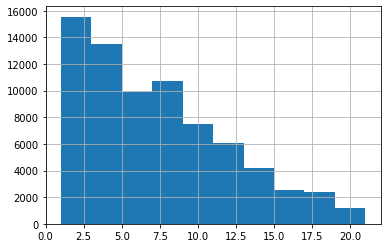

In [7]:
ceps_in_range.cep.value_counts().hist()
ceps_in_range.cep.value_counts().describe()

Some examples, in this case the second to last column (origin is bodyshops by name, destination is cep by coordinates). **This is the projected distance, which doesn't account for the actual path...  I guess this is alright**

In [8]:
ceps_in_range[ceps_in_range.cep==ceps_in_range.cep.value_counts().index[0]]

,cep,cep_longitude,cep_latitude,bodyshop_name,bodyshop_longitude,bodyshop_latitude,distance_meters
18559240,04549060,-46.677226,-23.59975,Scattini Funilaria,-46.6636607,-23.6112234,2054.987367
18559241,04549060,-46.677226,-23.59975,Oficina Marques (Vila Mascote),-46.655485,-23.6562648,7280.834277
18559242,04549060,-46.677226,-23.59975,Oficina Marques (Santo Amaro),-46.6845705,-23.6216384,2782.021715
18559246,04549060,-46.677226,-23.59975,Evolution,-46.644144,-23.5238023,9931.479495
18559247,04549060,-46.677226,-23.59975,Quatrocentos,-46.7104603,-23.6731984,9661.351926
18559253,04549060,-46.677226,-23.59975,Solução Automotiva,-46.7605456,-23.5993133,9275.263122
18559259,04549060,-46.677226,-23.59975,Funilaria Paulista,-46.6824952,-23.5260509,8969.663679
18559260,04549060,-46.677226,-23.59975,Corifeu Automec,-46.7256709,-23.573455,6267.770614
18559263,04549060,-46.677226,-23.59975,Nicola Garage,-46.6544191,-23.5311412,8710.631259
18559267,04549060,-46.677226,-23.59975,MsFix,-46.7269609,-23.5362116,9497.445374


![alt text](images/distance1.png "Title")

Let's see examples of CEP we reach with only one bodyshop

In [9]:
ceps_in_range[ceps_in_range.cep.isin(ceps_in_range.cep.value_counts().loc[(ceps_in_range.cep.value_counts()==1)].index)]
                                                                          

,cep,cep_longitude,cep_latitude,bodyshop_name,bodyshop_longitude,bodyshop_latitude,distance_meters
1137018,06600000,-46.900948,-23.420386,CB Car,-46.88537,-23.4815434,7620.909744
1204945,07272000,-46.402641,-23.358215,Studio Marilia Botelho,-46.3265113,-23.3953212,9595.364105
1226165,06324000,-46.715834,-23.308445,Car Solution Express,-46.7139688,-23.38973,9857.878827
1396143,07400000,-46.351907,-23.345430,Studio Marilia Botelho,-46.3265113,-23.3953212,6678.073079
2155526,06386000,-46.803697,-23.434140,Torque Tamboré,-46.8333405,-23.4926955,7834.781373
...,...,...,...,...,...,...,...
19976687,08692020,-46.320328,-23.492312,Seadriccar,-46.3449644,-23.5004303,2914.129923
19976883,08692025,-46.320328,-23.492312,Seadriccar,-46.3449644,-23.5004303,2914.129923
19976932,08692045,-46.324534,-23.491218,Seadriccar,-46.3449644,-23.5004303,2534.297880
19977030,08692055,-46.324534,-23.491218,Seadriccar,-46.3449644,-23.5004303,2534.297880


---
## 2. Sanity checks on snapshot for Mat

Check the data makes sense. 

### 2.1. Get the data
Collect the snapshot

In [10]:
cur.execute("SELECT * FROM dbt_albertoscf.covered_ceps_snapshot")
data = pd.DataFrame(cur.fetchall(), columns=[desc[0] for desc in cur.description])[['cep', 'is_open', 'timestamp_changed']]
data.fillna(0, inplace=True)
data.head()


,cep,is_open,timestamp_changed
0,00000001,0.0,2021-12-13 15:26:16+00:00
1,00000007,0.0,2021-12-13 15:26:16+00:00
2,00000011,0.0,2021-12-13 15:26:16+00:00
3,00000012,0.0,2021-12-13 15:26:16+00:00
4,00000036,0.0,2021-12-13 15:26:16+00:00


Collect the detail

In [11]:
cur.execute("SELECT * FROM dbt_albertoscf.cep_codes_summary_table")
summary = pd.DataFrame(cur.fetchall(), columns=[desc[0] for desc in cur.description])
summary.head()


,cep,cep_longitude,cep_latitude,bodyshop_name,bodyshop_longitude,bodyshop_latitude,distance_meters,proximity_rank_order
0,00000200,-46.140157,-23.273968,LSP Reparos,-46.2191402,-23.29531,9164.921096,1
1,00000343,-46.496200,-23.708636,Goias Car (Santo Andre),-46.5164876,-23.6617701,6128.312202,1
2,00000600,-46.804701,-23.491943,Torque Tamboré,-46.8333405,-23.4926955,3189.477857,1
3,00000600,-46.804701,-23.491943,New Fenix,-46.7922508,-23.5190307,3568.399142,2
4,00000600,-46.804701,-23.491943,Office Car,-46.8123067,-23.5238926,3969.880671,3


### 6.2. Some sanity checks
Sample some open cep codes and some closed cep codes

In [12]:
open_cep_sample = list(data[data['is_open']==1].cep.sample(10))
closed_cep_sample = list(data[data['is_open']==0].cep.sample(10))


Query closed in the table

In [13]:
summary[summary['cep'].isin(closed_cep_sample)]

,cep,cep_longitude,cep_latitude,bodyshop_name,bodyshop_longitude,bodyshop_latitude,distance_meters,proximity_rank_order


Collect closed from the distances info

In [35]:
cur.execute("SELECT * FROM dbt_albertoscf.cep_codes_all_distances WHERE cep IN ('"+"', '".join(closed_cep_sample)+"')")
detail = pd.DataFrame(cur.fetchall(), columns=[desc[0] for desc in cur.description])
detail.head()


,cep,cep_longitude,cep_latitude,bodyshop_name,bodyshop_longitude,bodyshop_latitude,distance_meters
0,12912630,-46.535472,-22.955406,Scattini Funilaria,-46.6636607,-23.6112234,80749.314992
1,12912630,-46.535472,-22.955406,Oficina Marques (Vila Mascote),-46.655485,-23.6562648,85995.550610
2,12912630,-46.535472,-22.955406,Oficina Marques (Santo Amaro),-46.6845705,-23.6216384,82432.042418
3,12912630,-46.535472,-22.955406,Ponce e Filho,-46.5703805,-23.5588674,73222.155203
4,12912630,-46.535472,-22.955406,Dimas Norte,-46.6126825,-23.4999513,66523.290505


Check the pairs at closest distance - which still don't make the 10km cut

In [48]:
detail[detail['distance_meters'].isin(detail.distance_meters.sort_values(ascending=True)[:5])].sort_values('distance_meters')


,cep,cep_longitude,cep_latitude,bodyshop_name,bodyshop_longitude,bodyshop_latitude,distance_meters
346,08742360,-46.225901,-23.541416,Seadriccar,-46.3449644,-23.5004303,14157.339069
357,08742360,-46.225901,-23.541416,Studio Marilia Botelho,-46.3265113,-23.3953212,20970.988203
339,08742360,-46.225901,-23.541416,Solicar,-46.4509088,-23.5390576,25049.397639
355,08742360,-46.225901,-23.541416,Donicar,-46.4512972,-23.4975991,25648.701494
319,12307000,-45.955900,-23.293465,LSP Reparos,-46.2191402,-23.29531,29304.629306


Check them in maps - all of them make sense. Now check open cep codes and check the closest location

In [50]:
summary[(summary['cep'].isin(open_cep_sample)) & (summary['proximity_rank_order']==1)]

,cep,cep_longitude,cep_latitude,bodyshop_name,bodyshop_longitude,bodyshop_latitude,distance_meters,proximity_rank_order
76561,02982180,-46.718787,-23.461054,Coronato,-46.6926754,-23.5116367,6792.789838,1
172025,04283050,-46.604148,-23.607277,Martelinho Bacelar,-46.6472389,-23.606799,4797.195218,1
253090,05324150,-46.754883,-23.545365,Mec Max,-46.7760856,-23.539489,2465.722459,1
338090,06180180,-46.801200,-23.533840,Office Car,-46.8123067,-23.5238926,1728.357035,1
384461,06852460,-46.862017,-23.704212,Centro Automotivo GL,-46.8443961,-23.7056758,1969.612605,1
395768,07273320,-46.415786,-23.459873,Donicar,-46.4512972,-23.4975991,6049.099999,1
401484,08081060,-46.421251,-23.482712,Donicar,-46.4512972,-23.4975991,3801.622904,1
421040,08596650,-46.295647,-23.486892,Seadriccar,-46.3449644,-23.5004303,5730.614482,1
422578,08695410,-46.279610,-23.493968,Seadriccar,-46.3449644,-23.5004303,7317.426795,1
457916,16030250,-46.766367,-23.560397,Mec Max,-46.7760856,-23.539489,2759.801345,1


All good! Export to csv

In [7]:
cur.execute("SELECT * FROM dbt_albertoscf.covered_ceps_snapshot")
data = pd.DataFrame(cur.fetchall(), columns=[desc[0] for desc in cur.description])[['cep', 'is_open', 'timestamp_changed']]
data.fillna(0, inplace=True)
data['is_open'] = data['is_open'].astype(bool)
data.head()


,cep,is_open,timestamp_changed
0,00000001,False,2021-12-13 15:26:16+00:00
1,00000007,False,2021-12-13 15:26:16+00:00
2,00000011,False,2021-12-13 15:26:16+00:00
3,00000012,False,2021-12-13 15:26:16+00:00
4,00000036,False,2021-12-13 15:26:16+00:00


In [8]:
data.to_csv('open_ceps_v0.csv', index=False)